### TOPIC: Sentiment analysis of the demonetization of Zimbabwe  economy

### Abstract

The overal goal of this paper is to do sentiment analysis on the recent adoption of new currency by
Ministry of Finance through Statutory SI 142/19. The sentiments will be meauserd from Tweets sent by several people on the subject. Tweets will be extracted from the Twitter platform via twint application which when run on commadline giving starting and ending dates,it gives the data in the form of csv file which later can be analysed via TextBlob checking whether Tweets from people where positive, negative or neutral towards the introduction of the new currency.TextBlob from several tests carried out before it was proven to provide accurate results on tested data

### Problem Statement

The problem in sentiment analysis is classifying the polarity of a given text in a tweet,sentence, or feature. In tweets, the aspect level whether the expressed opinion in the tweet is positive,negative, or neutral. Sentiment analysis is to be used to score the tweets and determine opinions about demonetization of the Zimbabwean economy


### Aims and Objectives

This study aims to do a sentiment analysis on the recently introduced bill by Ministry of Finance,**SI 142/19**, which resulted in the introduction of a new currency.There was a lot of discussion on the social media by people on this bill and this data in the form of tweets will be collected for this study. The following are some of the objectives this research will try to achieve.

**.** Collection of tweets via twint application

**.** Cleaning of Tweets Data

**.** Coming up with a DataFrame from the tweets

**.** Analysing of tweets

**.** Graph Representations of tweets

### Related Work

A lot of research has been carried out before on sentiment analysis. Some of the areas where research is still being carried out include, elections time checking how people like or dislike a particular candidate,customer management systems,where the company may want to know the response of customers on a particular product.

Kumar et al.(2019)in their study,**“Sentiment Analysis of Electronic Product Tweets Using Big Data Framework”**,found out how customers were responding to electronic products being sold.This information helps management to make decision on the products so as to maintain customers and acquiring new ones.

Alvares et al.(2017)in their research,**“Sentiment Analysis of Twitter and Facebook Data Using Map-Reduce”**,found out that Twitter and Facebook has a vast amount of data that can be extracted when researching on any popular topic that people may be talking about on social media.Data was collected from these social network using APIs,and using Hadoop the data was broken down into smaller pieces which made it easier to handle and also analyse.

Kasper and Vela(2011)in**“Sentiment analysis for hotel reviews”**,managed to review all sentiment from comments of customers.In the end the system classified customer responses into positive,negative and neutral
This helped in improving the services offered by the Hotel.   

### Methodology

For this research TextBlob will be used to evaluate tweets for sentiments. Tweets will be collected via twint application using a major disscussion topic to capture what people will be discussing.In this case **Zim new curency** was used to capture all tweets that discused about the new currency.Data was extracted and a csv file was generated with 946 rows and 31 columnns.The tweets were cleaned removing all unnecessary data which if left was to affect the analysis.Some of the unnecessary things include,links,non english words. 

The cleaned tweets text is then made into a DataFrame. Analysis,that is positive,negative or neutral will be made on every tweet. The results of the sentiment analysis will be shown via graphs

### Importing Libraries

In [2]:
from textblob import TextBlob 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import sys
sns.set()

In [4]:
data=pd.read_csv('newzimbond.csv')

In [5]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1165740203300085760,1165516326280019968,1566769097000,2019-08-25,23:38:17,South Africa Standard Time,3095464911,markiemark191,MarkieMark,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '3095464911', 'username': 'markie...",NaN
1,1165663514847059969,1165649125800599552,1566750813000,2019-08-25,18:33:33,South Africa Standard Time,4022564956,colgrove11,George Colgrove III ⭐️⭐️⭐️ 🤟,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4022564956', 'username': 'colgro...",NaN
2,1165654103327948800,1165649125800599552,1566748569000,2019-08-25,17:56:09,South Africa Standard Time,4022564956,colgrove11,George Colgrove III ⭐️⭐️⭐️ 🤟,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '4022564956', 'username': 'colgro...",NaN
3,1165138650214129664,1165138650214129664,1566625676000,2019-08-24,07:47:56,South Africa Standard Time,1068082003885592576,zim24_news,Zim24News,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1068082003885592576', 'username'...",NaN
4,1164836488439193602,1164836488439193602,1566553635000,2019-08-23,11:47:15,South Africa Standard Time,970038709981712385,cyzer_33,Mighty💪 CyZer 👊,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '970038709981712385', 'username':...",NaN


In [6]:
data.shape

(946, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 31 columns):
id                 946 non-null int64
conversation_id    946 non-null int64
created_at         946 non-null int64
date               946 non-null object
time               946 non-null object
timezone           946 non-null object
user_id            946 non-null int64
username           946 non-null object
name               946 non-null object
place              0 non-null float64
tweet              946 non-null object
mentions           946 non-null object
urls               946 non-null object
photos             946 non-null object
replies_count      946 non-null int64
retweets_count     946 non-null int64
likes_count        946 non-null int64
hashtags           946 non-null object
cashtags           946 non-null object
link               946 non-null object
retweet            946 non-null bool
quote_url          51 non-null object
video              946 non-null int64
near      

In [8]:
data.describe

<bound method NDFrame.describe of                       id      conversation_id     created_at        date  \
0    1165740203300085760  1165516326280019968  1566769097000  2019-08-25   
1    1165663514847059969  1165649125800599552  1566750813000  2019-08-25   
2    1165654103327948800  1165649125800599552  1566748569000  2019-08-25   
3    1165138650214129664  1165138650214129664  1566625676000  2019-08-24   
4    1164836488439193602  1164836488439193602  1566553635000  2019-08-23   
..                   ...                  ...            ...         ...   
941  1025491090655326208  1025491090655326208  1533331103000  2018-08-03   
942  1025490324796461056  1025485099339579393  1533330920000  2018-08-03   
943  1025213779557138435  1025190087229730816  1533264987000  2018-08-03   
944  1025209738131206145  1017951880058736641  1533264023000  2018-08-03   
945  1024635984275750917  1024610749363175425  1533127230000  2018-08-01   

         time                    timezone            

In [9]:
data['tweet']

0      Is the new Zim dollar pegged on par with the U...
1      The bonds were sold after the ZIM was discarde...
2      I make this distinction because historically “...
3      New currency not priority: Ncube  https://www....
4      Did you know each time there is a new currency...
                             ...                        
941    Hmmm...yeah,just divided the USD amount by the...
942    I didn’t figure it... is that what it is? I ca...
943    I heard Zim that you hold is worthless as soon...
944    She blocked that many? LOL That's quite a numb...
945    I’m so angry yaz abantu bakithi let us all dow...
Name: tweet, Length: 946, dtype: object

### Cleaning Tweets

### First removing links in every tweet

In [10]:
data['tweet'] = data['tweet'].apply((lambda x: re.sub('https?://[A-Za-z0-9./]+','',x)))

### Removing numbers in every tweet

In [11]:
data['tweet'] = data['tweet'].apply((lambda x: re.sub('[^a-zA-Z]',' ', x)))

### Remove usernames in every tweet

In [12]:
data['tweet'] = data['tweet'].apply((lambda x: re.sub(r'@[A-Za-z0-9]+','',x)))

### Changing to lower case and removing space

In [13]:
data['tweet'] = data['tweet'].apply(lambda x: x.lower())

### Removing stop words 

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

### Selecting Columns in the Original DataFrame

In [15]:
for col in data.columns:
    print(col)

id
conversation_id
created_at
date
time
timezone
user_id
username
name
place
tweet
mentions
urls
photos
replies_count
retweets_count
likes_count
hashtags
cashtags
link
retweet
quote_url
video
near
geo
source
user_rt_id
user_rt
retweet_id
reply_to
retweet_date


In [16]:
data2=data[['date','time','username','timezone','likes_count','retweets_count','user_id','tweet']]
data2.head()

,date,time,username,timezone,likes_count,retweets_count,user_id,tweet
0,2019-08-25,23:38:17,markiemark191,South Africa Standard Time,0,0,3095464911,is the new zim dollar pegged on par with the u...
1,2019-08-25,18:33:33,colgrove11,South Africa Standard Time,0,0,4022564956,the bonds were sold after the zim was discarde...
2,2019-08-25,17:56:09,colgrove11,South Africa Standard Time,9,2,4022564956,i make this distinction because historically ...
3,2019-08-24,07:47:56,zim24_news,South Africa Standard Time,0,0,1068082003885592576,new currency not priority ncube currency no...
4,2019-08-23,11:47:15,cyzer_33,South Africa Standard Time,0,0,970038709981712385,did you know each time there is a new currency...


In [17]:
data2['tweet'] = data2['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

C:\Users\Tatenda.DESKTOP-IK07DMG\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data2.tail()

,date,time,username,timezone,likes_count,retweets_count,user_id,tweet
941,2018-08-03,23:18:23,maroney_casey,South Africa Standard Time,0,0,2178249589,hmmm yeah divided usd amount zim tril better r...
942,2018-08-03,23:15:20,christopbay,South Africa Standard Time,1,0,470993901,figure called citibank said exchange zim new c...
943,2018-08-03,04:56:27,truthseeking8,South Africa Standard Time,0,0,1024720612529528832,heard zim hold worthless soon zimbabwe puts ne...
944,2018-08-03,04:40:23,ramblernash,South Africa Standard Time,2,1,2841067860,blocked many lol quite number people pointing ...
945,2018-08-01,14:40:30,ayandamabhena1,South Africa Standard Time,0,0,752141969342816260,angry yaz abantu bakithi let us learn selfish ...


### Cleaned data values

In [20]:
data2['tweet'].values

array(['new zim dollar pegged par us currency zim understands goods barter one wonders un allows despot destroy economy remain power',
       'bonds sold zim discarded zimbabwe bonds purchased us dollars global currencies zimbabwe issued new currency exchange put bonds zimbabwe new currency',
       'make distinction historically new currencies issued due extreme devaluation currency hyper inflation zim perfect example dollar still strong',
       'new currency priority ncube currency priority ncube pic twitter com bm nhxstyj',
       'know time new currency billion lost citizens indirectly zim get ready zim dollar notes coins pic twitter com uh izvmycx',
       'new currency priority ncube pic twitter com kpydhzrodr',
       'mthulincube kugara zve meeting uku nwae wage compression major factor think best addressed simultaneously new real zim currency economy needs real money mavhure matigary bititendai hon kasukuwere rangamataire ruvhenekop pic twitter com xapkijtwrd',
       'harm n

In [21]:
data2['sentiment'] = data2['tweet'].apply(lambda tweet: TextBlob(tweet).sentiment[0])

C:\Users\Tatenda.DESKTOP-IK07DMG\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data2.head()

,date,time,username,timezone,likes_count,retweets_count,user_id,tweet,sentiment
0,2019-08-25,23:38:17,markiemark191,South Africa Standard Time,0,0,3095464911,new zim dollar pegged par us currency zim unde...,-0.031818
1,2019-08-25,18:33:33,colgrove11,South Africa Standard Time,0,0,4022564956,bonds sold zim discarded zimbabwe bonds purcha...,0.090909
2,2019-08-25,17:56:09,colgrove11,South Africa Standard Time,9,2,4022564956,make distinction historically new currencies i...,0.263939
3,2019-08-24,07:47:56,zim24_news,South Africa Standard Time,0,0,1068082003885592576,new currency priority ncube currency priority ...,0.136364
4,2019-08-23,11:47:15,cyzer_33,South Africa Standard Time,0,0,970038709981712385,know time new currency billion lost citizens i...,0.168182


In [23]:
data2.tail()

,date,time,username,timezone,likes_count,retweets_count,user_id,tweet,sentiment
941,2018-08-03,23:18:23,maroney_casey,South Africa Standard Time,0,0,2178249589,hmmm yeah divided usd amount zim tril better r...,0.245455
942,2018-08-03,23:15:20,christopbay,South Africa Standard Time,1,0,470993901,figure called citibank said exchange zim new c...,0.193182
943,2018-08-03,04:56:27,truthseeking8,South Africa Standard Time,0,0,1024720612529528832,heard zim hold worthless soon zimbabwe puts ne...,-0.331818
944,2018-08-03,04:40:23,ramblernash,South Africa Standard Time,2,1,2841067860,blocked many lol quite number people pointing ...,0.409091
945,2018-08-01,14:40:30,ayandamabhena1,South Africa Standard Time,0,0,752141969342816260,angry yaz abantu bakithi let us learn selfish ...,-0.215909


### Exploratory Data Analysis(EDA)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DECF8A7B8>,
      dtype=object)

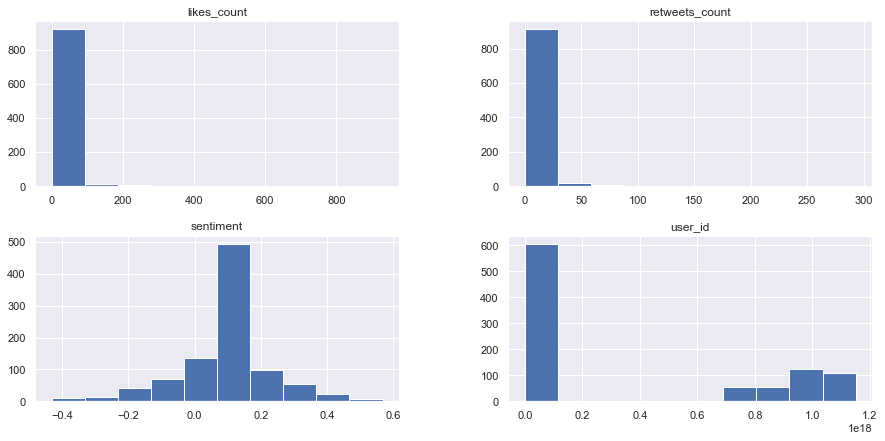

In [24]:
data2.hist(figsize=(15,7))

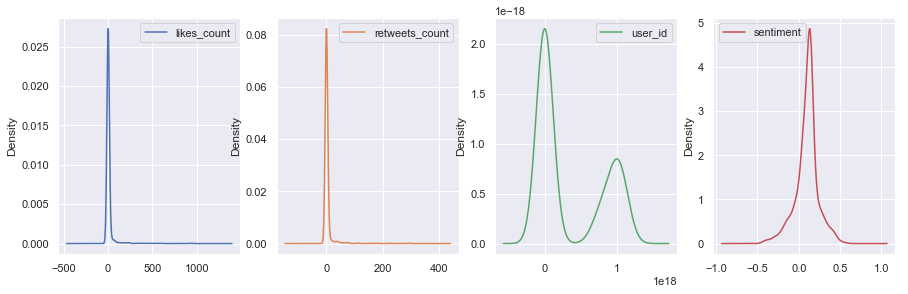

In [25]:
# Density
data2.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(15,20))
plt.show()

### Correlation 

In [26]:
data2.corr(method='pearson')

,likes_count,retweets_count,user_id,sentiment
likes_count,1.000000,0.872643,-0.073971,-0.017945
retweets_count,0.872643,1.000000,-0.067074,-0.060703
user_id,-0.073971,-0.067074,1.000000,-0.034511
sentiment,-0.017945,-0.060703,-0.034511,1.000000


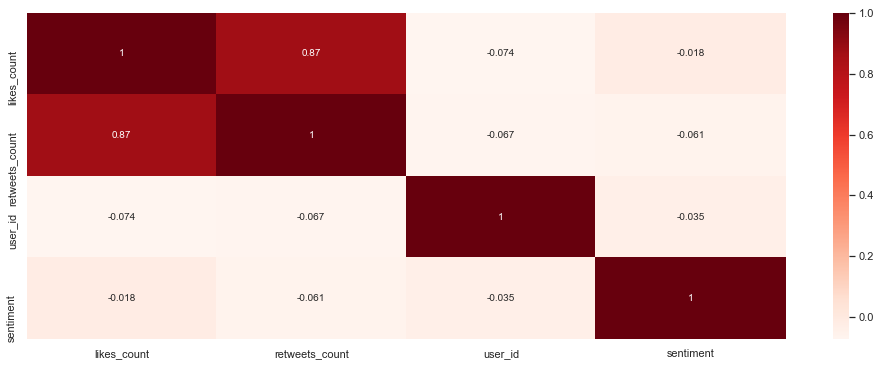

In [27]:
plt.figure(figsize=(17,6))
sns.heatmap(data2.corr(),cmap='Reds',annot=True)

### Analysing Tweets

In [28]:
count=0
count1=0
count2=0
for i in range(946):
    print(data2['tweet'].values[i])
    analysis = TextBlob(data['tweet'].values[i])
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
        print('Positive')
        count+=1
    elif analysis.sentiment[0]<0:
        print('Negative')
        count1+=1
    else:
        print('Neutral')
        count2+=1

new zim dollar pegged par us currency zim understands goods barter one wonders un allows despot destroy economy remain power
Sentiment(polarity=-0.02121212121212122, subjectivity=0.48484848484848486)
Negative
bonds sold zim discarded zimbabwe bonds purchased us dollars global currencies zimbabwe issued new currency exchange put bonds zimbabwe new currency
Sentiment(polarity=0.03693181818181818, subjectivity=0.3210227272727273)
Positive
make distinction historically new currencies issued due extreme devaluation currency hyper inflation zim perfect example dollar still strong
Sentiment(polarity=0.2639393939393939, subjectivity=0.7125757575757576)
Positive
new currency priority ncube currency priority ncube pic twitter com bm nhxstyj
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
know time new currency billion lost citizens indirectly zim get ready zim dollar notes coins pic twitter com uh izvmycx
Sentiment(polarity=0.2787878787878788, subjectivity=0.48

Sentiment(polarity=0.37878787878787884, subjectivity=0.4515151515151515)
Positive
video new zim currency prevent dollarisation mthuli ncube finance minister new zimbabwe currency prevent dollarisation mthuli ncube finance minister zimbabwe zimdollar rtgs mthulincube pic twitter com otfbwwkxbq
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
next year time mthuli ncube cutting zeros new zim currency mthulincube wamagaisa profjnmoyo mamoxn
Sentiment(polarity=-0.15454545454545454, subjectivity=0.4515151515151515)
Negative
speaking nice food hoping whole new currency business return normalcy restaurant business club zim eating become go release chaos ya prices
Sentiment(polarity=0.31212121212121213, subjectivity=0.6181818181818182)
Positive
likely happen new zim currency political reforms remains source economical problem without name currency currency lynnestactia talithagudo dudumo daddyhope sekuru gudo kristenmuwani pic twitter com r ivzecel
Sentiment(p

Sentiment(polarity=-0.17272727272727273, subjectivity=0.35590909090909084)
Negative
zim must move away multi currency system tier local currency e bond swipe ecocash good business new currency work necessary reforms made work without reforms simple
Sentiment(polarity=-0.056439393939393935, subjectivity=0.464448051948052)
Negative
kwakatanga travellers cheque kukauya agro cheque kukazouya bearers cheque whatever name u may give still zim dollar u named bond yes ur new currency
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
difference new currency zim currency image simple honestly thats believe understanding business thrives values honest trust credibility reliability efficiency sustainability etc
Sentiment(polarity=0.3340909090909091, subjectivity=0.6529220779220779)
Positive
watch zim govt introduce new currency year end mnangagwa currency year end president
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
zimbabwe 

Sentiment(polarity=0.1365909090909091, subjectivity=0.5898863636363636)
Positive
april issue africanbizmag turning another classic genre huge reads big pharma ethiopia tech mtn woes uganda simandou steinmetz bashir sudan chaos zim new currency oh first redesign four years cracking
Sentiment(polarity=0.1906060606060606, subjectivity=0.39090909090909093)
Positive
instincts tell dinar part cabal gwhb plan plunder assets wealth knowing debt system nearing end planning currency reset rv using zim dinar imo new plan reset involves gold das
Sentiment(polarity=0.24545454545454545, subjectivity=0.6515151515151515)
Positive
bell equipment struggles gain traction new zim currency
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
bell equipment struggles gain traction new zim currency equipment struggles gain traction new zim currency
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
whats name need know zim new currency zimbabwe si

Sentiment(polarity=0.16818181818181818, subjectivity=0.32727272727272727)
Positive
maturityiswhen knw rtgs dollars nw new zim currency
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
zim economy set stabilise new currency measure launch economy set stabilise new currency measure launches
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
chamisa speaks new zim currency rtgs dollars speaks new currency
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
south african airways immediately dumps zim new currency african airways immediately dumps zim new currency pic twitter com snz zikflg
Sentiment(polarity=0.06818181818181818, subjectivity=0.22727272727272727)
Positive
gono tried way never worked problem currency economy simply trust gvmnt actions worsen daily trust path leads never say zim economy never ever recover unless new gvmnt office
Sentiment(polarity=-0.0027417027417027473, subjectiv

Sentiment(polarity=0.10162337662337663, subjectivity=0.3542207792207792)
Positive
takukubikirai new currency ease business zim dollar coming soon wallet near pic twitter com eywrowztp
Sentiment(polarity=0.11818181818181818, subjectivity=0.42727272727272725)
Positive
u left bond note z currency instability remain till june july gvnt rob pples money inflation eventually admit zfake n turn bank balances new zim currency n naturally inflate bcoz real zim usd rember want devaluation
Sentiment(polarity=0.1090909090909091, subjectivity=0.28863636363636364)
Positive
take u listen part interview compared traditional currencies bond said base new zim currency
Sentiment(polarity=-0.22121212121212122, subjectivity=0.7348484848484849)
Negative
new zimbabwe currency get sa rand peg zim dollar loading
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
bond problem could deal within year see coming replaced zim new currency maybe
Sentiment(polarity=0.13636363636363635, 

Sentiment(polarity=0.4162121212121212, subjectivity=0.6784848484848485)
Positive
new currency zim dollar sick tired nonsense head bigger nothing
Sentiment(polarity=-0.2444805194805195, subjectivity=0.6279220779220779)
Negative
true new zim currency called zim dollar l see might remind people dollar zim pound mari cool inga zambia kwacha means money one local languages
Sentiment(polarity=0.14227272727272727, subjectivity=0.4259090909090909)
Positive
bloomberg tv new york finance min mthulincube says strengthening us dollar fed raising rates bad news zim exports become uncompetitive zim working towards currency cutting spending building reserves
Sentiment(polarity=-0.14090909090909087, subjectivity=0.7553030303030303)
Negative
bloomberg tv new york finance min mthulincube says strengthening us dollar fed raising rates bad news zim exports become uncompetitive zim working towards currency cutting spending building reserves zimbabwe ncube currency cholera dollar china video
Sentiment(polar

In [29]:
count

775

In [30]:
count1

169

In [31]:
count2

2

### Sentiment Percentages

In [32]:
Positive_Tweets=100*count/len(data2['tweet'])
print('%.2f'%Positive_Tweets)

81.92


In [33]:
Negative_Tweets=100*count1/len(data2['tweet'])
print('%.2f'% Negative_Tweets)

17.86


In [34]:
Neutral_Tweets=100*count2/len(data2['tweet'])
print('%.2f'%Neutral_Tweets)

0.21


### Representing Sentiments on a Bar Graph

Text(0,0.5,'Frequency')

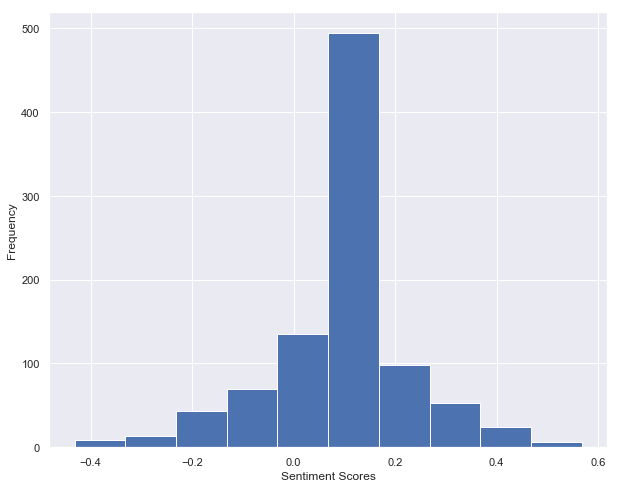

In [35]:
data2['sentiment'].hist(figsize=(10,8))
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')

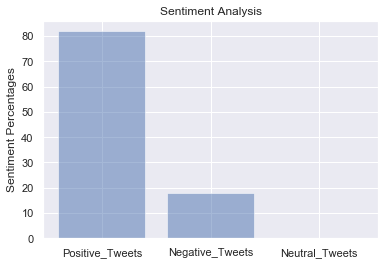

In [36]:
objects = ('Positive_Tweets','Negative_Tweets','Neutral_Tweets')
y_pos = np.arange(len(objects))
performance = [Positive_Tweets,Negative_Tweets,Neutral_Tweets]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

plt.ylabel('Sentiment Percentages')
plt.title('Sentiment Analysis')

plt.show()

### Representing Sentiments on a Pie Chart

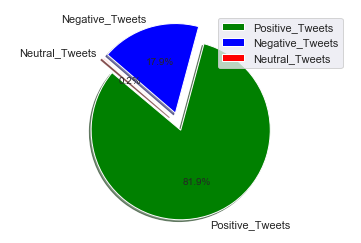

In [37]:
labels = 'Positive_Tweets','Negative_Tweets','Neutral_Tweets'
sizes = [Positive_Tweets,Negative_Tweets,Neutral_Tweets]
colors = ['green', 'blue', 'red']
explode = (0.1, 0.1, 0.1)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

### Likes and Retweet Graph

In [38]:
likes_graph = pd.Series(data=data2['likes_count'].values, index=data2['date'])

In [39]:
retweets_graph = pd.Series(data=data2['retweets_count'].values, index=data2['date'])

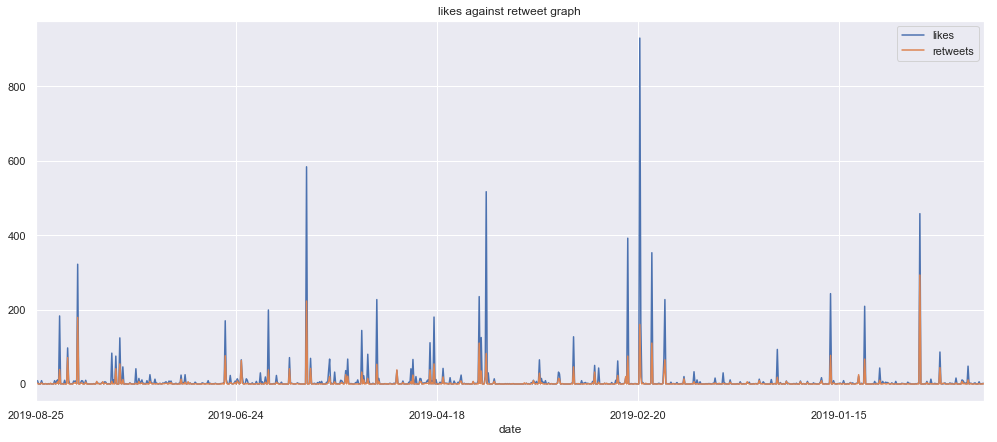

In [40]:
plt.title("likes against retweet graph")
likes_graph.plot(figsize=(17,7), label = "likes", legend=True)
retweets_graph.plot(figsize=(17,7), label = "retweets", legend=True)

### Analysis and Discussion

This research looked at sentiment analysis from tweets that were sent in response to the introduction of new currency by minister of finance Dr Muthuli Ncube through statutory instument **SI142 of 2019**.Overally the tweets were more positive.Although plenty research were done on sentiment analysis, and some discussed in early chapters of this research,no analysis of the new monetory policy was done.This,according to this research may be the first and this will help for keeping records on what people think on any government policies being introduced.

To get a comprehensive assessment more additionals can be made to this report. For instance, in this report only information from tweets were obtained.With other information from other social media platforms such as Facebook not collected means the result of the research is not covering the greater part of the population. According to statista(2019),a site that gathers stastistics of several things around the world, Facebook at approxmately 2.3billion users has almost ten times users of Twitter. The researchers had difficult in getting an API for facebook approved so as to get data for sentiment analysis.

The other additional improvement that can be made to this research is to include Zimbabwe main three langauges ,that is, English,Ndebele and Shona during the sentiment analysis so that data in venecular languages will be tested as well for sentiment.

### Conclusion

The conclusion that can be reached from this report is that one can easily measure the sentiment of anything as long data is available. The changing of currency through data from tweets was accurately measured.A research like this can easily be implimented on any topic that people will be disscussing on social media as it is cheap and results are obtained in a very short time.

### References

**P. Rajan, S. P. Victor (2014)**, “Web sentiment analysis for scoring positive or negative words using tweeter data”, International Journal of Computer Applications, 96(6), pp. 33-37.

**Alvares, N. Thakur, S. Patil, D. Fernandes, K. Jain (2016)**, “Sentiment analysis using opinion mining”, International Journal of Engineering Research & Technology, 5(4), pp.88-91.

**Kasper, W. & Vela, M. (2011)**, “Sentiment analysis for hotel reviews”, proceedings of the
computational linguistics-applications, Jacharanka Conference.

https://www.statista.com/statistics/272014/global-social-networks-ranked-by-number-of-users/ accessed 28/01/19


